Mood                       object
track_acousticness        float64
track_danceability        float64
track_energy              float64
track_instrumentalness    float64
track_liveness            float64
track_speechiness         float64
track_tempo               float64
track_valence             float64
dtype: object

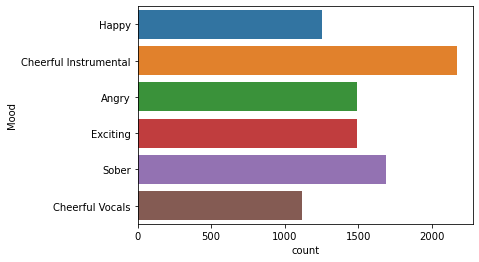

In [1]:
import matplotlib.pyplot as plt # plotting library
import numpy as np # library for numerical calculations
import pandas as pd # library for reading csv files
import seaborn as sns

data = pd.read_csv("clustered.csv")

sns.countplot(y="Mood", data=data)

data.dtypes

In [3]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_on_training_set(y_test, y_pred):
    
  print(classification_report(y_test,  y_pred, zero_division=0))
  print(confusion_matrix(y_test,y_pred))

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('Mood',1), 
                                                    data['Mood'],
                                                    test_size=0.3,
                                                    random_state=0) 

In [5]:
from sklearn.preprocessing import MinMaxScaler
 
x_scaler = MinMaxScaler() 
x_scaler.fit(X_train)

X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

In [12]:
# Method 1: Decision Tree
from sklearn import tree

model01 = tree.DecisionTreeClassifier(max_depth=9) 
model01.fit(X_train,y_train)
y_pred = model01.predict(X_test)

evaluate_on_training_set(y_test, y_pred)

                       precision    recall  f1-score   support

                Angry       0.94      0.95      0.94       440
Cheerful Instrumental       0.93      0.94      0.94       646
      Cheerful Vocals       0.96      0.97      0.97       343
             Exciting       0.95      0.92      0.94       457
                Happy       0.95      0.98      0.97       359
                Sober       0.95      0.92      0.94       519

             accuracy                           0.95      2764
            macro avg       0.95      0.95      0.95      2764
         weighted avg       0.95      0.95      0.94      2764

[[418   5   0  13   2   2]
 [  5 609   8   6   5  13]
 [  0   2 332   0   5   4]
 [ 17   7   0 422   6   5]
 [  1   0   4   2 352   0]
 [  6  33   1   0   0 479]]


In [23]:
# Method 2 : K neighbors
from sklearn.neighbors import KNeighborsClassifier

model02 = KNeighborsClassifier(n_neighbors=17)

model02.fit(X_train_norm, y_train) 

y_pred = model02.predict(X_test_norm)
evaluate_on_training_set(y_test, y_pred)

                       precision    recall  f1-score   support

                Angry       0.94      0.96      0.95       440
Cheerful Instrumental       0.93      0.98      0.95       646
      Cheerful Vocals       0.98      0.95      0.96       343
             Exciting       0.95      0.91      0.93       457
                Happy       0.99      0.95      0.97       359
                Sober       0.97      0.97      0.97       519

             accuracy                           0.96      2764
            macro avg       0.96      0.95      0.96      2764
         weighted avg       0.96      0.96      0.96      2764

[[424   5   0  11   0   0]
 [  1 630   2   3   0  10]
 [  0   9 327   0   4   3]
 [ 20  17   0 418   0   2]
 [  3   2   6   6 342   0]
 [  1  17   0   0   0 501]]


In [34]:
# Method 3 : AdaBoost
from sklearn.ensemble import AdaBoostClassifier
model03 = AdaBoostClassifier(n_estimators=1200, learning_rate=0.1)

model03.fit(X_train_norm, y_train) 

y_pred = model03.predict(X_test_norm) 
evaluate_on_training_set(y_test, y_pred)

                       precision    recall  f1-score   support

                Angry       0.87      0.90      0.89       440
Cheerful Instrumental       0.82      0.85      0.84       646
      Cheerful Vocals       0.96      0.93      0.94       343
             Exciting       0.88      0.88      0.88       457
                Happy       0.97      0.96      0.96       359
                Sober       0.87      0.81      0.84       519

             accuracy                           0.88      2764
            macro avg       0.89      0.89      0.89      2764
         weighted avg       0.88      0.88      0.88      2764

[[397  11   0  29   3   0]
 [  4 551   4  22   0  65]
 [  0  17 320   1   5   0]
 [ 49   2   0 404   2   0]
 [  0   1  11   4 343   0]
 [  7  91   0   1   0 420]]


In [44]:
# Method 4 : RandomForest
from sklearn.ensemble import RandomForestClassifier
model04 = RandomForestClassifier(n_estimators = 400)

model04.fit(X_train,y_train)
y_pred = model04.predict(X_test)
evaluate_on_training_set(y_test,y_pred)

                       precision    recall  f1-score   support

                Angry       0.95      0.96      0.96       440
Cheerful Instrumental       0.96      0.97      0.96       646
      Cheerful Vocals       0.97      0.99      0.98       343
             Exciting       0.96      0.96      0.96       457
                Happy       0.98      0.98      0.98       359
                Sober       0.98      0.96      0.97       519

             accuracy                           0.97      2764
            macro avg       0.97      0.97      0.97      2764
         weighted avg       0.97      0.97      0.97      2764

[[424   3   0  11   2   0]
 [  2 624   4   5   3   8]
 [  0   3 338   0   1   1]
 [ 13   2   0 438   2   2]
 [  1   0   5   2 351   0]
 [  4  16   0   0   0 499]]


In [16]:
# Method 5: Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

model05 = GaussianNB()

model05.fit(X_train_norm, y_train) 

y_pred = model05.predict(X_test_norm) 
evaluate_on_training_set(y_test, y_pred)

                       precision    recall  f1-score   support

                Angry       0.92      0.91      0.92       440
Cheerful Instrumental       0.94      0.96      0.95       646
      Cheerful Vocals       0.94      0.97      0.96       343
             Exciting       0.91      0.95      0.93       457
                Happy       0.96      0.96      0.96       359
                Sober       0.99      0.93      0.96       519

             accuracy                           0.95      2764
            macro avg       0.95      0.95      0.95      2764
         weighted avg       0.95      0.95      0.95      2764

[[401   6   1  28   4   0]
 [  5 618   9   5   4   5]
 [  0   5 333   0   4   1]
 [ 20   3   0 433   1   0]
 [  2   0   6   8 343   0]
 [  7  24   4   0   0 484]]
